In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/taddbackus/School/fall23/qtw/cs6/all_train.csv')

In [4]:
print(df)

         # label        f0        f1        f2        f3        f4        f5  \
0            1.0 -0.346368  0.416306  0.999236  0.475342  0.427493 -0.005984   
1            1.0  1.708236 -0.319394 -1.241873 -0.887231 -0.871906 -0.005984   
2            0.0 -0.360693  1.794174  0.264738 -0.472273 -0.292344 -1.054221   
3            1.0 -0.377914 -0.103932 -0.649434 -2.125015 -1.643797 -0.005984   
4            0.0 -0.067436 -0.636762 -0.620166 -0.062551  1.588715 -0.005984   
...          ...       ...       ...       ...       ...       ...       ...   
6999995      0.0  1.617264 -0.537084 -1.275867  0.650799 -1.511621  0.850488   
6999996      0.0 -0.511357  0.270927  0.085989 -0.243802 -1.035668 -0.005984   
6999997      1.0  0.062408 -0.987203  0.570667  1.517195  0.639548 -1.054221   
6999998      1.0  1.659131  1.096223  0.562821  1.627193  0.767236 -1.054221   
6999999      1.0  0.002034  0.744152 -0.908839 -0.770454  1.008405 -1.054221   

               f6        f7        f8  

In [8]:
del df

In [5]:
X = df.drop(columns=['# label'])
y = df['# label']
print(df.shape)
print(X.shape)
print(y.shape)

(7000000, 29)
(7000000, 28)
(7000000,)


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaledTrain = scaler.fit_transform(X)

In [11]:
print(scaledTrain.shape)

(7000000, 28)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaledTrain, y, test_size = 0.2)
X_predict, X_val, y_predict, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [31]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(128,activation='relu'))
#model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=100,
          batch_size=64,
          callbacks=[callback],
          validation_data=[X_val,y_val])

Epoch 1/100
87500/87500 [==============================] - 83s 939us/step - loss: 0.2983 - accuracy: 0.8609 - val_loss: 0.2862 - val_accuracy: 0.8705
Epoch 2/100
87500/87500 [==============================] - 82s 934us/step - loss: 0.2829 - accuracy: 0.8705 - val_loss: 0.2829 - val_accuracy: 0.8730
Epoch 3/100
87500/87500 [==============================] - 82s 942us/step - loss: 0.2780 - accuracy: 0.8735 - val_loss: 0.2859 - val_accuracy: 0.8749
Epoch 4/100
87500/87500 [==============================] - 83s 949us/step - loss: 0.2757 - accuracy: 0.8749 - val_loss: 0.2814 - val_accuracy: 0.8727
Epoch 5/100
87500/87500 [==============================] - 83s 947us/step - loss: 0.2743 - accuracy: 0.8757 - val_loss: 0.2826 - val_accuracy: 0.8758
Epoch 6/100
87500/87500 [==============================] - 81s 931us/step - loss: 0.2732 - accuracy: 0.8763 - val_loss: 0.2808 - val_accuracy: 0.8765
Epoch 7/100
87500/87500 [==============================] - 82s 933us/step - loss: 0.2726 - accuracy:

In [16]:
loss, acc = model.evaluate(X_test,y_test)
print(acc)

43750/43750 [==============================] - 23s 519us/step - loss: 0.2685 - accuracy: 0.8791
0.8790757060050964


In [26]:
print(history.history)

{'loss': [0.2991272509098053, 0.2830711901187897, 0.2776387333869934, 0.27468058466911316, 0.27264603972435, 0.2712540924549103, 0.2701995074748993, 0.2693994343280792, 0.2687590718269348, 0.26825079321861267, 0.2677081823348999, 0.2673660218715668, 0.2669734060764313, 0.2666451036930084, 0.2663871943950653, 0.26616278290748596, 0.26583483815193176, 0.2656494677066803], 'accuracy': [0.859774649143219, 0.8697656989097595, 0.8732699751853943, 0.874929666519165, 0.8762496709823608, 0.8768731951713562, 0.8775885701179504, 0.8781303763389587, 0.8784443140029907, 0.8786507248878479, 0.879001796245575, 0.8791139125823975, 0.8795614242553711, 0.879532516002655, 0.8798078298568726, 0.8798821568489075, 0.8800035715103149, 0.8802242875099182], 'val_loss': [0.2839556336402893, 0.277997761964798, 0.27882710099220276, 0.27469033002853394, 0.27146491408348083, 0.2720358073711395, 0.2686973214149475, 0.26885712146759033, 0.26736775040626526, 0.2699614465236664, 0.2675265669822693, 0.26862460374832153,

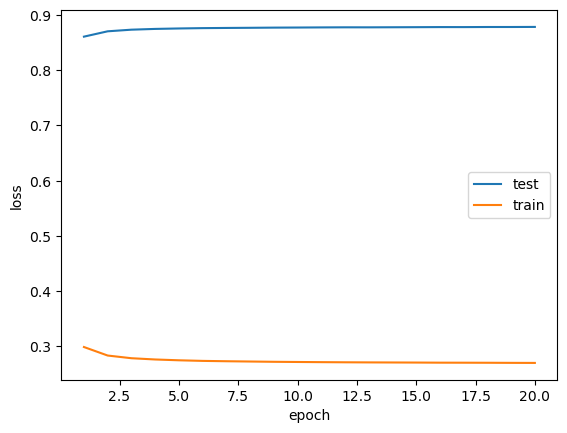

In [34]:
plt.plot(np.linspace(1,20,20),history.history['accuracy'],label='test')
plt.plot(np.linspace(1,20,20),history.history['loss'],label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()